<a href="https://colab.research.google.com/github/adeeconometrics/literate-programming/blob/main/Probability_Distributions_Discrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discrete Probability Distributions
by Dave Amiana

The purpose of this notebook is to introduce and explore some probability models in the discrete space; we shall explore by simulating random events in games of chance. 

The following probability distributions that we shall explore in this notebook are listed as follows:

- Binomial distribution
- Multinomial distribution
- Geometric distribution
- Hypergeometric distribution
- Poisson distribution

We will explore the derivation of these distributions, their motvation, assumptions, and applications. 

In [69]:
# import all the relevant packages
import matplotlib.pyplot as plt
import numpy as np
from sympy import init_printing, gamma, lambdify, oo, N, erf 
import sympy as sp

init_printing() # enable LaTeX output
x,y,z = sp.symbols("x y z") # initialize variables

# Preliminary Notes on related terms and concepts

- **random variable** - is described informally as a variable whose values depend on outcomes of a random phenomenon
- **Probability Mass Function** - function that gives the probability that a discrete random variable is equal to some value.

- **Frequency Distribution** - a table that displays the frequency of various outcomes **in a sample**.

- **Relative Frequency Distribution** - : a frequency distribution where each value has been divided (normalized) by a number of outcomes in a sample i.e. sample size.

- **Discrete Probability Distribution Function** -  general term to indicate the way the total probability of 1 is distributed over **all** various possible outcomes (i.e. over entire population) for discrete random variable.

- **Cumulative Distribution Function** -  function evaluating the probability that $X$ will take a value less than or equal to $x$ for a discrete random variable.
- **Categorical Distribution** -  for discrete random variables with a finite set of values.


In [36]:
# definition of cumulative sum in numpy
arr = [i+1 for i in range(0,10)]
np.cumsum(arr)

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45, 55])

In [37]:
# implementation of user-defined algo
def _cumsum(series):
    temp = 0; temp_arr=[]
    for i in range(0, len(series)):
        temp = temp + series[i]
        temp_arr = temp_arr + [temp]
    return temp_arr

_cumsum(arr)

## Discrete Uniform Distribution
Discussion:
The discrete uniform distribution is a symmetric probability distribution wherein a finite number of values are equally likely to be observed; every one of n values has equal probability 1/n. Another way of saying "discrete uniform distribution" would be "a known, finite number of outcomes equally likely to happen".

----


#### Definition:
Probability Mass Function:
$$f(x)=\frac{1}{x}$$

Cumulative Distribution Function
$$F(k;a,b)={\frac  {\lfloor k\rfloor -a+1}{b-a+1}}$$



In [2]:
def uniform_dist_pmf(n):
    return 1/len(n)

def uniform_dist_cdf(a,b,x):
    return (np.floor(x)-a+1)/(b-a+1)

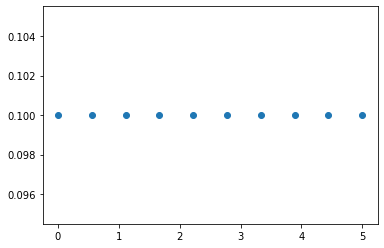

In [11]:
# visualizing the PMF of Uniform Distirbution

x_unif = np.linspace(0,5,10)
y_unif_pdf = np.array([uniform_dist_pmf(x_unif) for i in range(0,len(x_unif))])
plt.scatter(x_unif,y_unif_pdf)

In [18]:
# cumulative sum of pdf
np.cumsum(y_unif_pdf)[-1]  # should be very close to 1

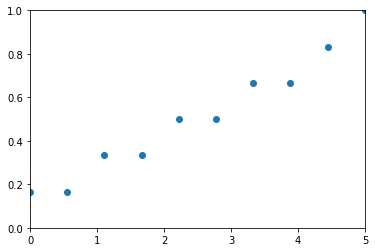

In [9]:
#  visualizing the CDF of Uniform Distirbution

y_unif_cdf = np.array([uniform_dist_cdf(0,5,i) for i in x_unif])
plt.scatter(x_unif,y_unif_cdf)
plt.ylim(0,1)
plt.xlim(0,5)

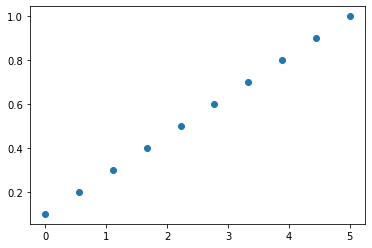

In [35]:
# not used np.floor() function
plt.scatter(x_unif, np.cumsum(y_unif_pdf))

## Binomial Distribution

Discussion:
In probability theory and statistics, the binomial distribution  is a result of binomial experiments where the experimenter is asking a yes-no question where each comes with its own Boolean-valued outcome: *success* (with probability *p*) or failure (with probability *q=p-1*).

----
### Motivation
In general, if the *random variable* $X$ follows  the binomial distribution with parameters $n \in \mathbb{N}$ and $p\in [0,1]$, we write X ~ B(n,p). Hence we define the function:

$${f(k,n,p)=\Pr(k;n,p)=\Pr(X=k)={\binom {n}{k}}p^{k}(1-p)^{n-k}} $$
 for $k=0,1,2,..., n, $ where 
 $${{\binom {n}{k}}={\frac {n!}{k!(n-k)!}}}$$

is the binomial coefficient, hence the name of the distribution.

The formula can be understood as follows: $k$ successes occur with probability $p^k$ and $n − k$ failures occur with probability $(1 − p)^{n − k}$. However, the k successes can occur anywhere among the n trials, and there are ${\binom {n}{k}}$ different ways of distributing k successes in a sequence of $n$ trials.

----
### Assumptions & Applications


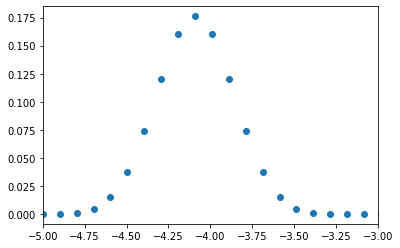

In [13]:
# plotting binomial distribution
n = 20; p=0.5

def bin_dist_pmf(n,p, k):
    list_k = [i+1 for i in range(0,k)]
    n_k = np.array([np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(np.abs(n-k))) for k in list_k])
    return n_k*np.power(p,k)*np.power(1-p, n-k)

x_bin = np.linspace(-5,5,100)
y_bin_pmf = bin_dist_pmf(n,p, len(x_bin))

plt.scatter(x_bin,y_bin_pmf)
plt.xlim(-5, -3)

In [20]:
# cumulative sum of bin_pdf
np.cumsum(y_bin_pmf)[-1]  # should be very close to 1

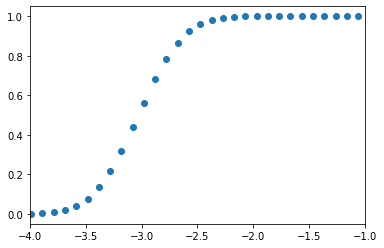

In [14]:
# cdf binomial distribution
n=40;p=0.5

def bin_dist_cdf(n,p,k):
    bin_coef = lambda _i: np.array((np.math.factorial(n)/(np.math.factorial(_i)*np.math.factorial(np.abs(n-_i))))*(np.power(p,_i)*np.power((1-p),n-_i)))
    return np.cumsum([bin_coef(j) for j in range(0,k)], dtype=float)

x = np.linspace(-5,5,100)
y_bin_cdf = bin_dist_cdf(n,p,len(x))
y_bin_cdf
plt.scatter(x,y_bin_cdf)

plt.xlim(-4, -1)

In [ ]:
# simulation

## Multinomial Distribution

### Discussion
In probability theory, the multinomial distribution is a generalization of the binomial distribution. For example, it models the probability of counts for each side of a k-sided dice rolled n times. For n independent trials each of which leads to a success for exactly one of k categories, with each category having a given fixed success probability, the multinomial distribution gives the probability of any particular combination of numbers of successes for the various categories


### Functional Definition

Probability Mass Function

$${\displaystyle {\begin{aligned}f(x_{1},\ldots ,x_{k};n,p_{1},\ldots ,p_{k})&{}=\Pr(X_{1}=x_{1}{\text{ and }}\dots {\text{ and }}X_{k}=x_{k})\\&{}={\begin{cases}{\displaystyle {n! \over x_{1}!\cdots x_{k}!}p_{1}^{x_{1}}\times \cdots \times p_{k}^{x_{k}}},\quad &{\text{when }}\sum _{i=1}^{k}x_{i}=n\\\\0&{\text{otherwise,}}\end{cases}}\end{aligned}}}$$
for non-negative integers $x_1, ..., x_k$.

the probability mass function can be expressed using the gamma function as:

$${f(x_{1},\dots ,x_{k};p_{1},\ldots ,p_{k})={\frac {\Gamma (\sum _{i}x_{i}+1)}{\prod _{i}\Gamma (x_{i}+1)}}\prod _{i=1}^{k}p_{i}^{x_{i}}.}$$

### Assumptions & Applications


In [ ]:
# definition of functions

def mult_dist_pmf(n,**kwargs="x"):
    if(sum(x)==n):
        _coef = np.factorial(n)/(np.product([np.factorial(x_i) for x_i in x]))
        _p = np.product([np.power(p_i,x_i) for p_i in p for x_i in x])
        return _p*_coef
    else:
        return 0

def mult_dist_cdf():
    pass

In [ ]:
# visualization

In [ ]:
# simulation

## Geometric Distribution

### Discussion
The geometric distribution represents the number of failures before you get a success in a series of Bernoulli trials.
The geometric distribution is either one of two discrete probability distributions:

- The probability distribution of the number X of Bernoulli trials needed to get one success, supported on the set { 1, 2, 3, ... }

- The probability distribution of the number Y = X − 1 of failures before the first success, supported on the set { 0, 1, 2, 3, ... }
Which of these one calls "the" geometric distribution is a matter of convention and convenience.


### Functional Definition
PMF of Geometric distribution

$${\displaystyle (1-p)^{k-1}p}$$
where 
-  $p$ is the probability of success  
- $k$ is the number of trials

CDF of Geometric distribution

$${\displaystyle 1-(1-p)^{k}}$$
where 
-  $p$ is the probability of success  
- $k$ is the number of trials

### Assumptions & Applications
The geometric distribution is an appropriate model if the following assumptions are true.

- The phenomenon being modeled is a sequence of independent trials.
- There are only two possible outcomes for each trial, often designated success or failure.
- The probability of success, p, is the same for every trial.

If these conditions are true, then the geometric random variable $Y$ is the count of the number of failures before the first success. The possible number of failures before the first success is 0, 1, 2, 3, and so on. In the graphs above, this formulation is shown on the right.

An alternative formulation is that the geometric random variable $X$ is the total number of trials up to and including the first success, and the number of failures is $X − 1$. In the graphs above, this formulation is shown on the left.

In [11]:
# definition of functions : THIS IS NOT CORRECT?
def geom_dist_pmf(p,k):
    _dist = lambda x: np.power((1-p),(x-1))*p
    return _dist(k)

def geom_dist_cdf(p,k):
    return 1-np.power(1-p,k)

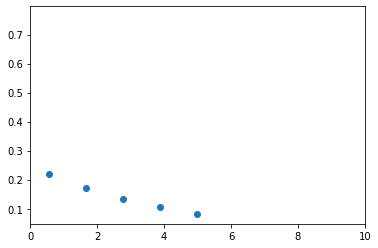

In [12]:
# visualization pmf
p = 0.20
x_geom = np.linspace(-5,5,10)
y_geom_pmf = np.array([geom_dist_pmf(p,k) for k in x_geom])

plt.scatter(x_geom, y_geom_pmf)
plt.xlim(0,10)

In [13]:
np.cumsum(y_geom_pmf)[-1]  # should be very close to 1

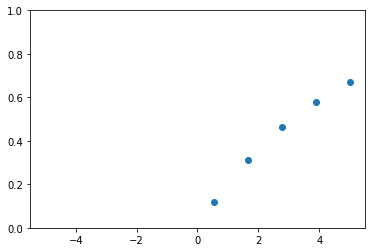

In [14]:
# visualization pmf
y_geom_cdf = np.array([geom_dist_cdf(p,k) for k in x_geom])

plt.scatter(x_geom, y_geom_cdf)
plt.ylim(0,1)

In [10]:
y_geom_cdf[-1]  # should be very close to 1

In [ ]:
# simulations

## Hypergeometric Distribution

### Discussion

### Functional Definition
PMF of hyper geometric distribution

$${\displaystyle p_{X}(k)=\Pr(X=k)={\frac {{\binom {K}{k}}{\binom {N-K}{n-k}}}{\binom {N}{n}}}}={{n \choose k}{{N-n} \choose {K-k}} \over {N \choose K}}$$

Parameters of the PMF
- $N$ is the population size,
- $K$ is the number of success states in the population,
- $k$ is the number of observed successes,
- $n$ is the number of draws (i.e. quantity drawn in each trial),
- ${\textstyle \textstyle {a \choose b}}$ is a binomial coefficient: 
$$\binom {n}{k}=\frac {n!}{k!(n-k)!}$$

### Assumptions & Applications

In [ ]:
# left identity
def hyp_geom_pmf_l(N, K, n,x):
    bin_coef = lambda _x,_y: np.array(np.math.factorial(_x)/(np.math.factorial(_y)*np.math.factorial(np.abs(_x-_y))))
    return (bin_coef(K,x)*bin_coef(N-K,n-x))/bin_coef(N,n)

hyp_geom_pmf_l(50,5,10,4)

0.003964583058015066

In [ ]:
# right identity
def hyp_geom_pmf_r(N, K, n,x):
    bin_coef = lambda _x,_y: np.array(np.math.factorial(_x)/(np.math.factorial(_y)*np.math.factorial(np.abs(_x-_y))))
    return (bin_coef(n,x)*bin_coef(N-n,K-x))/bin_coef(N,K)

hyp_geom_pmf_r(50,5,10,4)

0.003964583058015066

(0.0, 40.0)

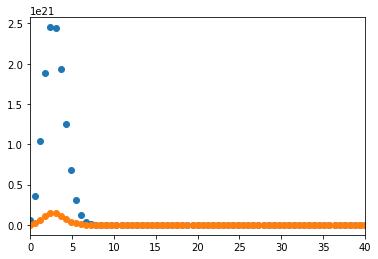

In [ ]:
# plotting hyper geometric distribution
def hyp_geom_pmf(N, K, n,k):
    bin_coef = lambda _x,_y: np.array(np.math.factorial(_x)/(np.math.factorial(_y)*np.math.factorial(np.abs(_x-_y))))
    hyp_g_coef = np.array([(bin_coef(K,x)*bin_coef(N-n,np.abs(K-x)))/bin_coef(N,n) for x in range(0, k)])
    return hyp_g_coef

x = np.linspace(0,60,100)
y = hyp_geom_pmf(500, 50, 30, len(x))
y_2 = hyp_geom_pmf(500, 50, 31, len(x))
plt.scatter(x,y)
plt.scatter(x,y_2)
plt.xlim(0,40)

In [ ]:
# simulation

## Poisson Distribution

### Discussion

### Functional Definition

### Assumptions & Applications